In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Our eyes Are one of the most important senses that help us to make contact with each other and allow us to see the beauty and abomination around us. Eyes are susceptible to diseases. Eye diseases include Glaucoma, Diabetic retinopathy, and Cataracts. Early diagnosis and treatment of eye diseases can preserve eyesight.

# **Eye Diseases**
**Glaucoma:** Group of eye diseases that can damage the Optic nerve, Optic nerve is responsible for transmitting visual information from the eye to the brain. Glaucoma can lead to permanent vision loss and, in some cases, Blindness

**Diabetic retinopathy:** It's an Eye condition that affects people with diabetes. High blood sugar leaves damaged vessels in the retina (The retina is that part of your eyes that can detect light and send signals to the brain). Damage to these blood vessels can lead to vision loss and Blindness in some cases.

**Cataracts:** Cataracts cloud the natural eye lens, leading to blurry vision and difficulty seeing clearly. Aging is one of the main reasons for this disease, but it can also be caused by factors such as injury, genetics, or medication effects. Cataracts can make natural vision blurry, cloudy, and even double it.

By better understanding these eye diseases, their causes, and their effects on vision, we can develop insights to aid their early detection and effective management. This notebook tries to classify these diseases from pictures.

# **Data Visualization**

['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']


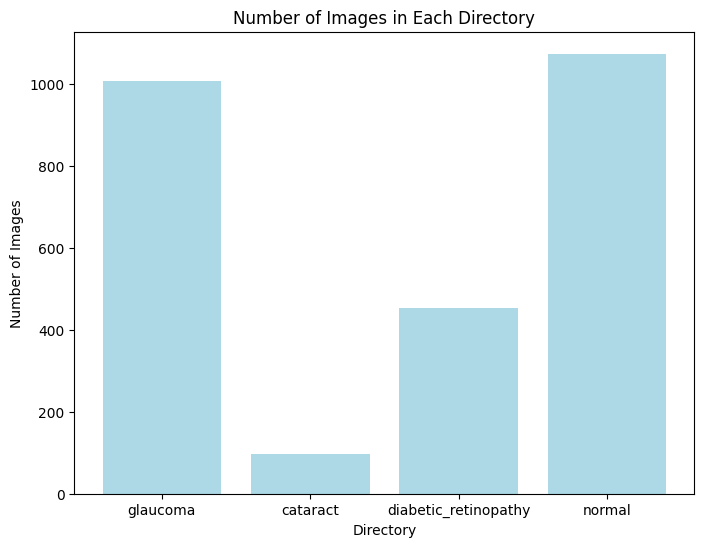

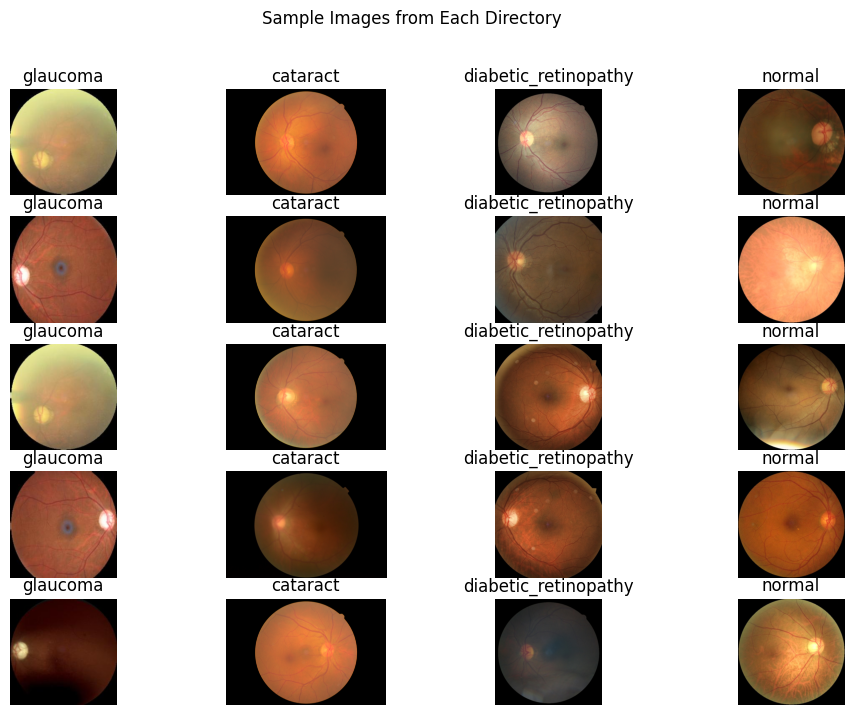

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# Create a Path and check what we have.
folder_path = '/content/drive/MyDrive/AAnithya/dataset'
dirs = os.listdir('/content/drive/MyDrive/AAnithya/dataset')
print(dirs)

# Count the number of images in each directory
image_counts = [len(os.listdir(os.path.join(folder_path, dir_name))) for dir_name in dirs]

# Plotting the number of images in each directory
plt.figure(figsize=(8, 6))
plt.bar(dirs, image_counts, color='lightblue')
plt.xlabel('Directory')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Directory')
plt.show()

# Visualize some sample images from each directory
plt.figure(figsize=(12, 8))
for i, dir_name in enumerate(dirs):
    class_folder = os.path.join(folder_path, dir_name)
    files_path = os.listdir(class_folder)[:5]

    for j, fp in enumerate(files_path):
        plt.subplot(5, len(dirs), j * len(dirs) + i + 1)
        img = imread(os.path.join(class_folder, fp))
        plt.imshow(img)
        plt.title(dir_name)
        plt.axis('off')

plt.suptitle('Sample Images from Each Directory')
plt.show()


Successfully imported
['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/50
29/29 [==============================] - 50s 266ms/step - loss: 0.7098 - accuracy: 0.7349 - val_loss: 2.7507 - val_accuracy: 0.7451
Epoch 2/50
29/29 [==============================] - 4s 121ms/step - loss: 0.3366 - accuracy: 0.8532 - val_loss: 1.4527 - val_accuracy: 0.5294
Epoch 3/50
29/29 [==============================] - 3s 119ms/step - loss: 0.2861 - accuracy: 0.8916 - val_loss: 2.0194 - val_accuracy: 0.2843
Epoch 4/50
29/29 [==============================] - 4s 125ms/step - loss: 0.2403 - accuracy: 0.9003 - val_loss: 0.9090 - val_accuracy: 0.5098
Epoch 5/50
29/29 [==============================] - 4s 121ms/step - loss: 0.1443 - accuracy: 0.9452 - val_loss: 3.5746 - val_accuracy: 0.2549
Epoch 6/50
29/29 [==============================] - 4s 126ms/step - loss: 0.1791 - accuracy: 0.9277 - val_loss: 3.6326 - val_accuracy: 0.2941
Epo

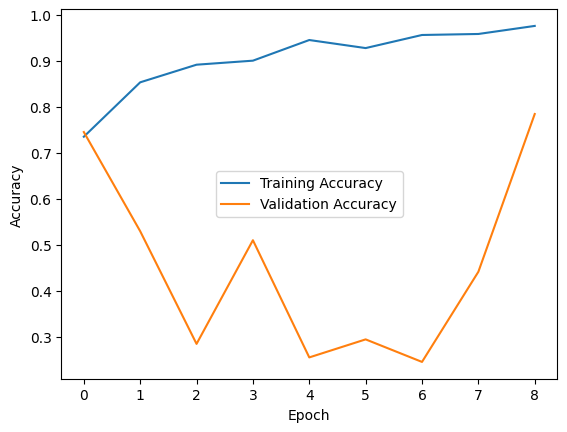

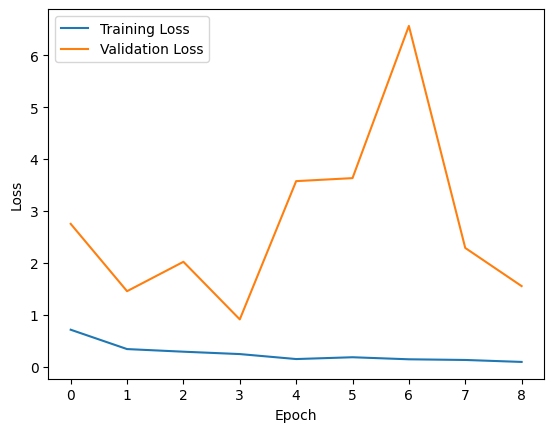

In [2]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, History

print('Successfully imported')

# Create a Path and check what we have.
folder_path = '/content/drive/MyDrive/AAnithya/dataset'
dirs = os.listdir('/content/drive/MyDrive/AAnithya/dataset')
print(dirs)

# Read All images from each directory and Resize them to 224*224 to use less RAM
X_list = []
y = []

for i in range(len(dirs)):
    class_folder = os.path.join(folder_path, dirs[i])
    files_path = os.listdir(class_folder)

    for fp in files_path:
        img = imread(os.path.join(class_folder, fp))
        if img.shape == (512, 512, 3):
            img = img[::2, ::2, :]
            img = img[:224, :224, :]
            X_list.append(img)
            y.append(dirs[i])

X = np.array(X_list)
y = np.array(y)

# One-hot encode the labels
le = LabelEncoder()
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=len(dirs))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the neural network model
model = Sequential()
model.add(tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(dirs), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Convolutional Neural Network (CNN)**

Successfully imported
['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']
Epoch 1/50
34/34 [==============================] - 5s 70ms/step - loss: 193.7468 - accuracy: 0.6106 - val_loss: 0.6033 - val_accuracy: 0.7479
Epoch 2/50
34/34 [==============================] - 1s 41ms/step - loss: 0.6645 - accuracy: 0.7535 - val_loss: 0.4800 - val_accuracy: 0.7899
Epoch 3/50
34/34 [==============================] - 1s 40ms/step - loss: 0.5350 - accuracy: 0.7890 - val_loss: 0.4725 - val_accuracy: 0.7899
Epoch 4/50
34/34 [==============================] - 1s 37ms/step - loss: 0.4877 - accuracy: 0.7890 - val_loss: 0.4940 - val_accuracy: 0.7899
Epoch 5/50
34/34 [==============================] - 1s 40ms/step - loss: 0.4459 - accuracy: 0.7946 - val_loss: 0.4676 - val_accuracy: 0.8067
Epoch 6/50
34/34 [==============================] - 1s 38ms/step - loss: 0.4539 - accuracy: 0.8151 - val_loss: 0.5052 - val_accuracy: 0.7899
Epoch 7/50
34/34 [==============================] - 1s 39ms/step - loss

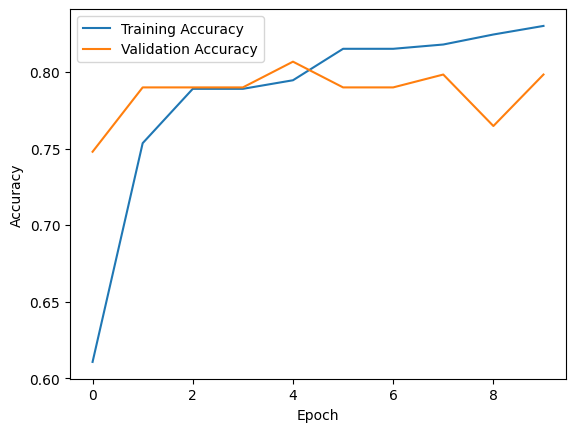

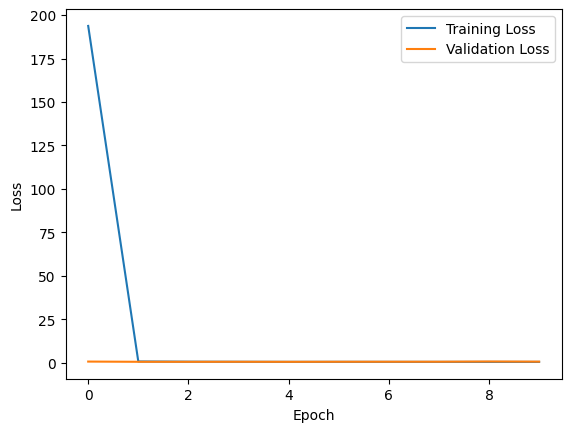

In [3]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

print('Successfully imported')

# Create a Path and check what we have.
folder_path = '/content/drive/MyDrive/AAnithya/dataset'
dirs = os.listdir('/content/drive/MyDrive/AAnithya/dataset')
print(dirs)

# Read All images from each directory and Resize them to 224*224 to use less RAM
X_list = []
y = []

for i in range(len(dirs)):
    class_folder = os.path.join(folder_path, dirs[i])
    files_path = os.listdir(class_folder)

    for fp in files_path:
        img = imread(os.path.join(class_folder, fp))
        if img.shape == (512, 512, 3):
            img = img[::2, ::2, :]
            img = img[:224, :224, :]
            X_list.append(img)
            y.append(dirs[i])

X = np.array(X_list)
y = np.array(y)

# One-hot encode the labels
le = LabelEncoder()
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=len(dirs))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(dirs), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **ResNet (Residual Neural Network)**

Successfully imported
['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/50
38/38 [==============================] - 13s 193ms/step - loss: 12.0381 - accuracy: 0.6717 - val_loss: 1.5627 - val_accuracy: 0.8060
Epoch 2/50
38/38 [==============================] - 5s 122ms/step - loss: 0.8028 - accuracy: 0.8037 - val_loss: 0.3533 - val_accuracy: 0.8433
Epoch 3/50
38/38 [==============================] - 4s 116ms/step - loss: 0.4421 - accuracy: 0.8371 - val_loss: 0.3897 - val_accuracy: 0.8134
Epoch 4/50
38/38 [==============================] - 4s 116ms/step - loss: 0.3516 - accuracy: 0.8530 - val_loss: 0.3316 - val_accuracy: 0.8731
Epoch 5/50
38/38 [==============================] - 4s 114ms/step - loss: 0.2898 - accuracy: 0.8697 - val_loss: 0.3970 - val_accuracy: 0.8582
Epoch 6/50
38/38 [==============================] - 5s 122ms/step - loss: 0.2985 - accuracy: 0.8906 - val_loss: 0.3261 - val_accuracy: 0.8731


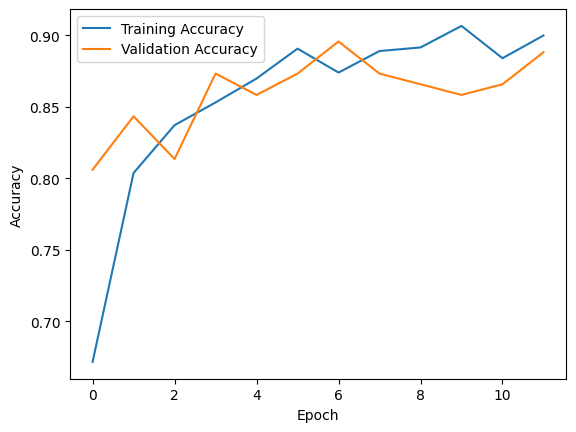

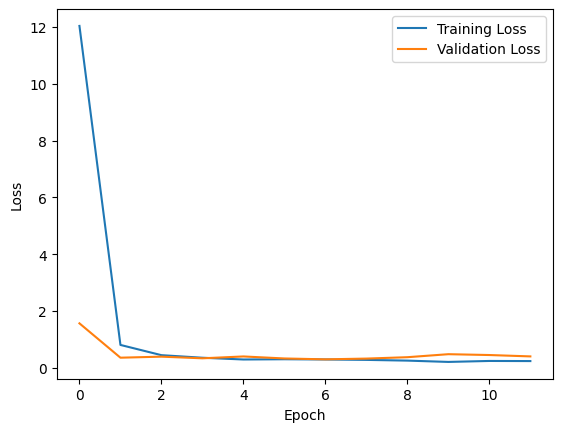

In [5]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

print('Successfully imported')

# Create a Path and check what we have.
folder_path = '/content/drive/MyDrive/AAnithya/dataset'
dirs = os.listdir('/content/drive/MyDrive/AAnithya/dataset')
print(dirs)

# Read All images from each directory and Resize them to 224*224 to use less RAM
X_list = []
y = []

for i in range(len(dirs)):
    class_folder = os.path.join(folder_path, dirs[i])
    files_path = os.listdir(class_folder)

    for fp in files_path:
        img = imread(os.path.join(class_folder, fp))
        if img.shape == (512, 512, 3):
            img = img[::2, ::2, :]
            img = img[:224, :224, :]
            X_list.append(img)
            y.append(dirs[i])

X = np.array(X_list)
y = np.array(y)

# One-hot encode the labels
le = LabelEncoder()
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=len(dirs))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the input images for ResNet
X_train_preprocessed = preprocess_input(X_train)
X_test_preprocessed = preprocess_input(X_test)

# Define the ResNet model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(dirs), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_preprocessed, y_test)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **VGG (Visual Geometry Group)**

Successfully imported
['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
41/41 [==============================] - 21s 351ms/step - loss: 6.2029 - accuracy: 0.7000 - val_loss: 0.3829 - val_accuracy: 0.8082
Epoch 2/50
41/41 [==============================] - 7s 170ms/step - loss: 0.5058 - accuracy: 0.8321 - val_loss: 0.3340 - val_accuracy: 0.8562
Epoch 3/50
41/41 [==============================] - 7s 171ms/step - loss: 0.3672 - accuracy: 0.8435 - val_loss: 0.3287 - val_accuracy: 0.8493
Epoch 4/50
41/41 [==============================] - 7s 168ms/step - loss: 0.3695 - accuracy: 0.8626 - val_loss: 0.3502 - val_accuracy: 0.8493
Epoch 5/50
41/41 [==============================] - 7s 167ms/step - loss: 0.3127 - accuracy: 0.8641 - val_loss: 0.4021 - val_accuracy: 0.8562
Epoch 6/50
41/41 [==============================] - 7s 167ms/step - loss: 0.2847 - accuracy: 0.8847 - val_loss: 0.3364 - val_accuracy: 0.8562
E

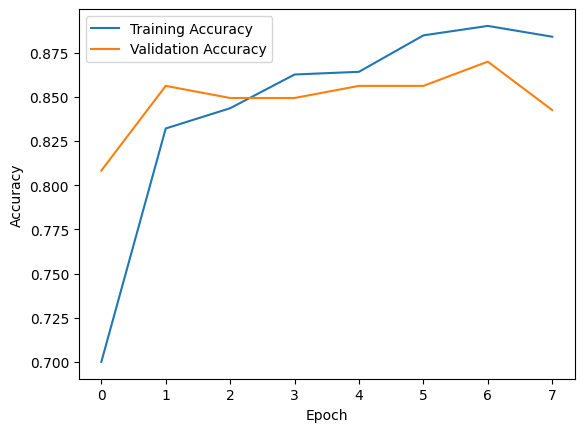

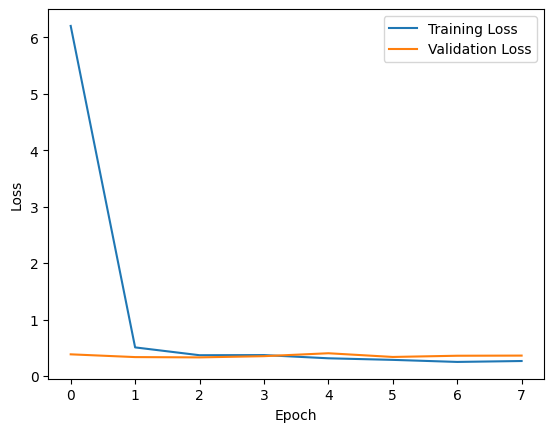

In [6]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

print('Successfully imported')

# Create a Path and check what we have.
folder_path = '/content/drive/MyDrive/AAnithya/dataset'
dirs = os.listdir('/content/drive/MyDrive/AAnithya/dataset')
print(dirs)

# Read All images from each directory and Resize them to 224*224 to use less RAM
X_list = []
y = []

for i in range(len(dirs)):
    class_folder = os.path.join(folder_path, dirs[i])
    files_path = os.listdir(class_folder)

    for fp in files_path:
        img = imread(os.path.join(class_folder, fp))
        if img.shape == (512, 512, 3):
            img = img[::2, ::2, :]
            img = img[:224, :224, :]
            X_list.append(img)
            y.append(dirs[i])

X = np.array(X_list)
y = np.array(y)

# One-hot encode the labels
le = LabelEncoder()
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=len(dirs))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the input images for VGG
X_train_preprocessed = preprocess_input(X_train)
X_test_preprocessed = preprocess_input(X_test)

# Define the VGG model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(dirs), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_preprocessed, y_test)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# **Data Augmentation**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train_preprocessed)

# Train the model with augmented data
history = model.fit(datagen.flow(X_train_preprocessed, y_train, batch_size=32),
                    steps_per_epoch=len(X_train_preprocessed) // 32,
                    epochs=50,
                    validation_data=(X_test_preprocessed, y_test),
                    callbacks=[early_stopping])


Epoch 1/50
45/45 [==============================] - 24s 532ms/step - loss: 1.4129 - accuracy: 0.5569 - val_loss: 0.8128 - val_accuracy: 0.6234
Epoch 2/50
45/45 [==============================] - 23s 511ms/step - loss: 1.0525 - accuracy: 0.5850 - val_loss: 0.8005 - val_accuracy: 0.5946
Epoch 3/50
45/45 [==============================] - 21s 456ms/step - loss: 0.9453 - accuracy: 0.5969 - val_loss: 0.7255 - val_accuracy: 0.6538
Epoch 4/50
45/45 [==============================] - 22s 485ms/step - loss: 0.9117 - accuracy: 0.6194 - val_loss: 0.7841 - val_accuracy: 0.6410
Epoch 5/50
45/45 [==============================] - 20s 450ms/step - loss: 0.8833 - accuracy: 0.6376 - val_loss: 0.8388 - val_accuracy: 0.6522
Epoch 6/50
45/45 [==============================] - 21s 466ms/step - loss: 0.9161 - accuracy: 0.6264 - val_loss: 0.7473 - val_accuracy: 0.6490
Epoch 7/50
45/45 [==============================] - 20s 450ms/step - loss: 0.8523 - accuracy: 0.6173 - val_loss: 0.8508 - val_accuracy: 0.6362

# **Fine-Tuning**

In [8]:
# Unfreeze the last few layers of the base model
base_model.trainable = True
fine_tune_at = -4
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with fine-tuning
history = model.fit(datagen.flow(X_train_preprocessed, y_train, batch_size=32),
                    steps_per_epoch=len(X_train_preprocessed) // 32,
                    epochs=50,
                    validation_data=(X_test_preprocessed, y_test),
                    callbacks=[early_stopping])


Epoch 1/50
45/45 [==============================] - 26s 525ms/step - loss: 0.8812 - accuracy: 0.6341 - val_loss: 0.7711 - val_accuracy: 0.6474
Epoch 2/50
45/45 [==============================] - 24s 528ms/step - loss: 0.8741 - accuracy: 0.6320 - val_loss: 0.7517 - val_accuracy: 0.6522
Epoch 3/50
45/45 [==============================] - 21s 464ms/step - loss: 0.8480 - accuracy: 0.6306 - val_loss: 0.6849 - val_accuracy: 0.6795
Epoch 4/50
45/45 [==============================] - 23s 522ms/step - loss: 0.8497 - accuracy: 0.6454 - val_loss: 0.7153 - val_accuracy: 0.6683
Epoch 5/50
45/45 [==============================] - 22s 478ms/step - loss: 0.7976 - accuracy: 0.6629 - val_loss: 0.8626 - val_accuracy: 0.6282
Epoch 6/50
45/45 [==============================] - 21s 469ms/step - loss: 0.7995 - accuracy: 0.6545 - val_loss: 0.5872 - val_accuracy: 0.7276
Epoch 7/50
45/45 [==============================] - 21s 458ms/step - loss: 0.8066 - accuracy: 0.6713 - val_loss: 0.6793 - val_accuracy: 0.6827

# **Using OpenCV**

Successfully imported
['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']
Epoch 1/50
55/55 [==============================] - 30s 247ms/step - loss: 4.3977 - accuracy: 0.6894 - val_loss: 0.5469 - val_accuracy: 0.8718
Epoch 2/50
55/55 [==============================] - 8s 151ms/step - loss: 0.6194 - accuracy: 0.8043 - val_loss: 0.4893 - val_accuracy: 0.8872
Epoch 3/50
55/55 [==============================] - 8s 145ms/step - loss: 0.5235 - accuracy: 0.8186 - val_loss: 0.4151 - val_accuracy: 0.8974
Epoch 4/50
55/55 [==============================] - 8s 144ms/step - loss: 0.4768 - accuracy: 0.8204 - val_loss: 0.4400 - val_accuracy: 0.8974
Epoch 5/50
55/55 [==============================] - 9s 155ms/step - loss: 0.5370 - accuracy: 0.8186 - val_loss: 0.4236 - val_accuracy: 0.8974
Epoch 6/50
55/55 [==============================] - 9s 158ms/step - loss: 0.4251 - accuracy: 0.8352 - val_loss: 0.3490 - val_accuracy: 0.9026
Epoch 7/50
55/55 [==============================] - 9s 156ms/step 

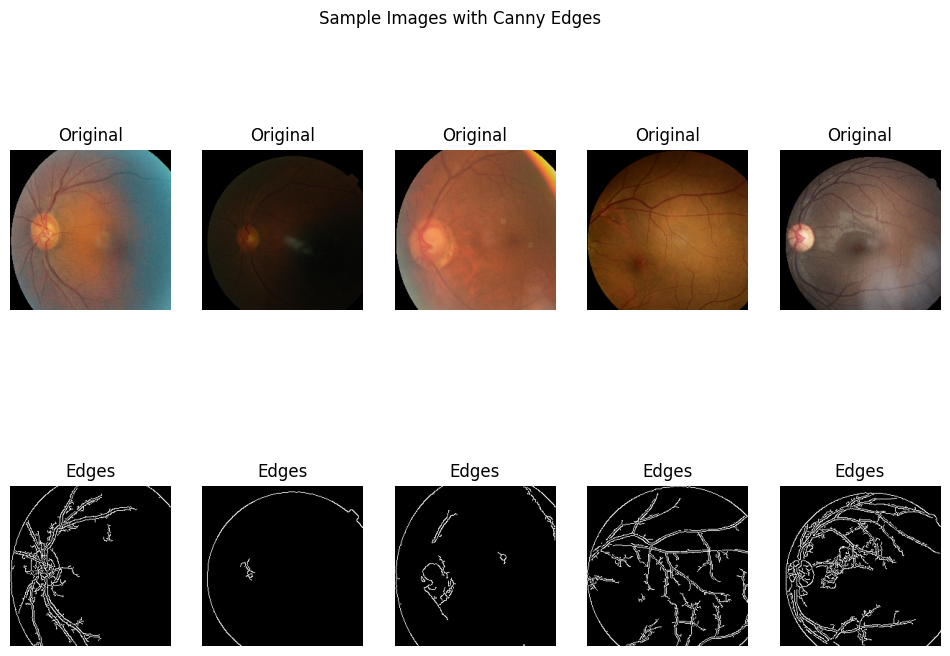

In [3]:
!pip install opencv-python
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

print('Successfully imported')

# Create a Path and check what we have.
folder_path = '/content/drive/MyDrive/AAnithya/dataset'
dirs = os.listdir('/content/drive/MyDrive/AAnithya/dataset')
print(dirs)

# Read All images from each directory and Resize them to 224*224 to use less RAM
X_list = []
y = []

for i in range(len(dirs)):
    class_folder = os.path.join(folder_path, dirs[i])
    files_path = os.listdir(class_folder)

    for fp in files_path:
        img = imread(os.path.join(class_folder, fp))
        if img.shape == (512, 512, 3):
            img = img[::2, ::2, :]
            img = img[:224, :224, :]
            X_list.append(img)
            y.append(dirs[i])

X = np.array(X_list)
y = np.array(y)

# One-hot encode the labels
le = LabelEncoder()
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=len(dirs))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the input images for VGG
X_train_preprocessed = preprocess_input(X_train)
X_test_preprocessed = preprocess_input(X_test)

# Define the VGG model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(dirs), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
# Train the model
history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_preprocessed, y_test)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

# Perform Canny edge detection and visualize the edges
def visualize_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, threshold1=30, threshold2=100)
    return edges

# Visualize sample images with their edges
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    edges = visualize_edges(X_train[i])
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.axis('off')

plt.suptitle('Sample Images with Canny Edges')
plt.show()


# **KNeighborsClassifier**

Successfully imported
['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']


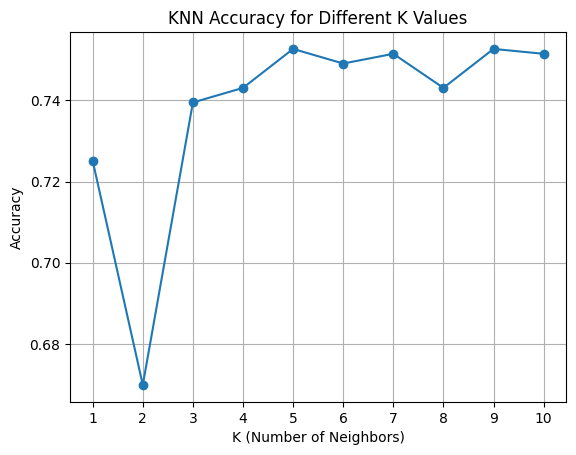

Best K value: 5
Test accuracy with best KNN (K=5): 0.75


In [2]:
import os
import numpy as np
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print('Successfully imported')

# Create a Path and check what we have.
folder_path = '/content/drive/MyDrive/AAnithya/dataset'
dirs = os.listdir('/content/drive/MyDrive/AAnithya/dataset')
print(dirs)

# Read All images from each directory and Resize them to 224*224 to use less RAM
X_list = []
y = []

for i in range(len(dirs)):
    class_folder = os.path.join(folder_path, dirs[i])
    files_path = os.listdir(class_folder)

    for fp in files_path:
        img = imread(os.path.join(class_folder, fp))
        if img.shape == (512, 512, 3):
            img = img[::2, ::2, :]
            img = img[:224, :224, :]
            X_list.append(np.reshape(img, (224*224*3)))
            y.append(dirs[i])

X = np.array(X_list)
y = np.array(y)

# One-hot encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN classifier
k_values = list(range(1, 11))  # Try different values of K from 1 to 10
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy for different values of K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best K with the highest accuracy
best_k = k_values[np.argmax(accuracies)]
print(f'Best K value: {best_k}')

# Train the KNN classifier with the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the best KNN model on the test set
y_pred_best = best_knn.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Test accuracy with best KNN (K={best_k}): {accuracy_best:.2f}')


# **Random Forest classifier**

Successfully imported
['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']
Random Forest Accuracy: 80.07%

Classification Report:
                      precision    recall  f1-score   support

            cataract       0.63      0.34      0.44        93
diabetic_retinopathy       0.99      1.00      0.99       325
            glaucoma       0.47      0.16      0.24        89
              normal       0.70      0.91      0.79       326

            accuracy                           0.80       833
           macro avg       0.70      0.60      0.62       833
        weighted avg       0.78      0.80      0.77       833



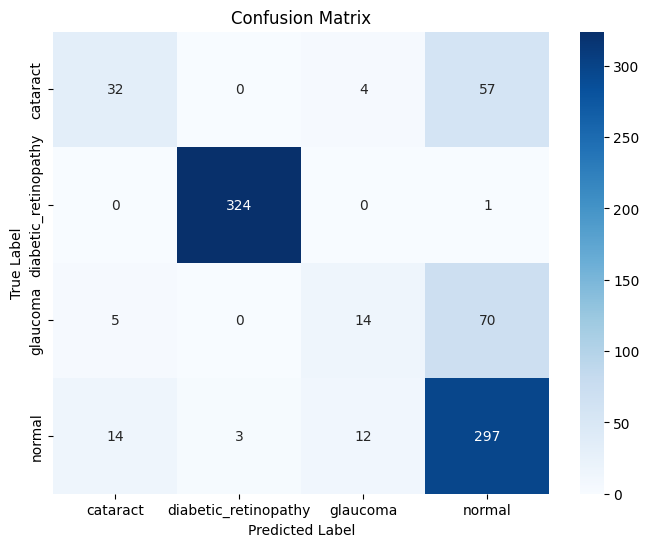

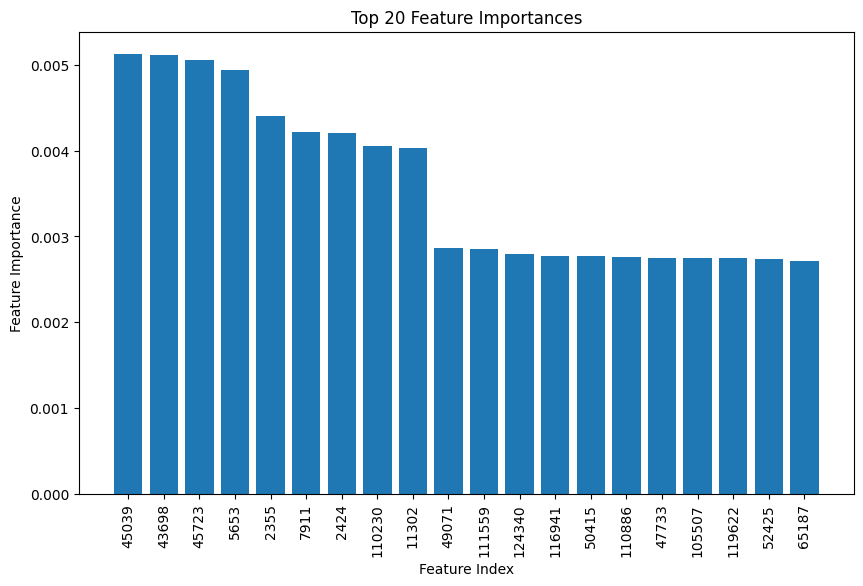

In [1]:
import os
import numpy as np
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print('Successfully imported')

# Create a Path and check what we have.
folder_path = '/content/drive/MyDrive/AAnithya/dataset'
dirs = os.listdir('/content/drive/MyDrive/AAnithya/dataset')
print(dirs)

# Read All images from each directory and Resize them to 224*224 to use less RAM
X_list = []
y = []

for i in range(len(dirs)):
    class_folder = os.path.join(folder_path, dirs[i])
    files_path = os.listdir(class_folder)

    for fp in files_path:
        img = imread(os.path.join(class_folder, fp))
        if img.shape == (512, 512, 3):
            img = img[::2, ::2, :]
            img = img[:224, :224, :]
            X_list.append(np.reshape(img, (224*224*3)))
            y.append(dirs[i])

X = np.array(X_list)
y = np.array(y)

# One-hot encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the Random Forest model on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualize feature importances
feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = 20
plt.figure(figsize=(10, 6))
plt.bar(range(top_features), feature_importances[sorted_idx][:top_features], align='center')
plt.xticks(range(top_features), sorted_idx[:top_features], rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Top {} Feature Importances".format(top_features))
plt.show()
